<a href="https://colab.research.google.com/github/aragan11/BME3053C-Spring-2025/blob/main/supervised_homework_1_AlexandraRagan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digit Classification
##### In this assignment, you will work with the [MNIST handwritten digits dataset](http://yann.lecun.com/exdb/mnist/) to implement and compare two supervised learning algorithms: Logistic Regression and Neural Networks. You will gain hands-on experience with data preprocessing, model training, evaluation, and visualization techniques commonly used in machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    from sklearn.datasets import fetch_openml
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.neural_network import MLPClassifier
    import seaborn as sns
except ImportError as e:
    import subprocess
    import sys

    print(f"Missing package: {str(e).split()[-1]}")
    print("Installing required packages...")
    %pip install scikit-learn
    %pip install seaborn


### Part 1: Data Loading and Exploration (4 points)
1. Load the MNIST dataset using fetch_openml
2. Print the following dataset characteristics:
   - Dataset dimensions and size
   - Number of classes
3. Visualize sample digits from the dataset


In [3]:
#Provide your code for part 1-1 here
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"]

Loading MNIST dataset...


In [4]:
#Provide your code for part 1-2 here
print("\nDataset Characteristics:")
print(f"- Data shape: {X.shape}")
print(f"- Labels shape: {y.shape}")
print(f"- Dataset size: {X.nbytes / (1024**2):.2f} MB")  # Convert bytes to megabytes
print(f"- Number of unique classes: {len(np.unique(y))}")
print(f"- Unique classes: {np.unique(y)}")


Dataset Characteristics:
- Data shape: (70000, 784)
- Labels shape: (70000,)
- Dataset size: 418.70 MB
- Number of unique classes: 10
- Unique classes: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']



Visualizing sample digits from the dataset...


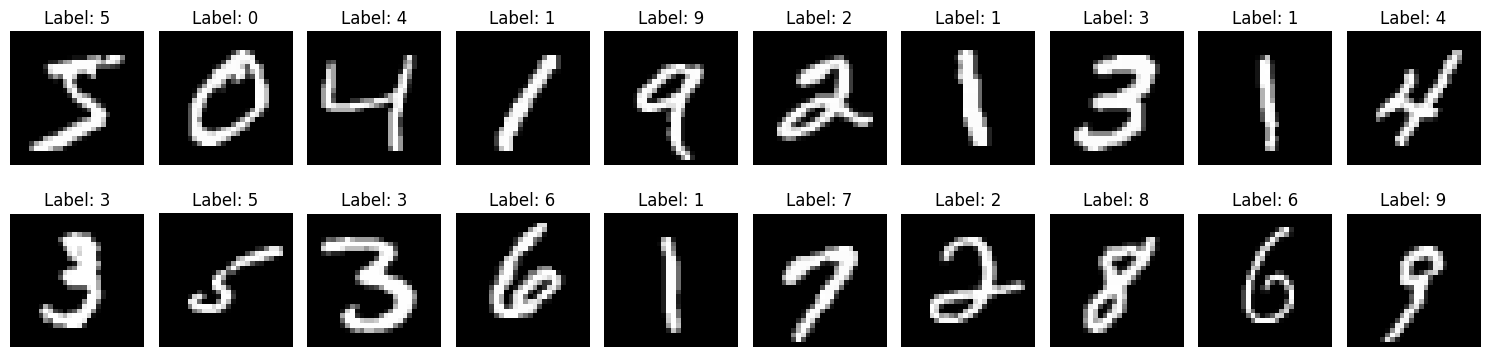

In [7]:
#Provide your code for part 1-3 here

print("\nVisualizing sample digits from the dataset...")

# Convert labels to integers (if needed)
y = y.astype(np.uint8)

# Plot 20 sample digits
fig, axes = plt.subplots(2, 10, figsize=(15, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')

plt.tight_layout()
plt.show()

### Part 2: Data Preprocessing (4 points)
1. Scale the pixel values to range [0,1] by dividing by 255
2. Split the data into training (80%) and testing (20%) sets
3. Create a StandardScaler object and fit it on the training data
4. Transform both training and test data using the fitted scaler
5. Print the shapes of the resulting training and test sets


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Scale pixel values to the range [0, 1]
X_scaled = X / 255.0




# 2. Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Create a StandardScaler object and fit on training data
scaler = StandardScaler()
scaler.fit(X_train)

# 4. Transform both training and test data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Print the shapes of the resulting datasets
print("=== Scaled Dataset Shapes ===")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape: ", X_test_scaled.shape)
print("y_train shape:       ", y_train.shape)
print("y_test shape:        ", y_test.shape)


=== Scaled Dataset Shapes ===
X_train_scaled shape: (80, 784)
X_test_scaled shape:  (20, 784)
y_train shape:        (80,)
y_test shape:         (20,)


### Part 3: Model Training and Evaluation (8 points)
1. Train a Logistic Regression model using the training data. Use the default parameters.
2. Train a Neural Network model using the training data. The neural network should have 2 hidden layers with 100 and 50 neurons respectively. Use the Adam optimizer and a learning rate of 0.001.

In [12]:
# Provide your code for part 3-1 here
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Train Logistic Regression model
print("Training Logistic Regression...")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_logreg = logreg.predict(X_test_scaled)
print("\n=== Logistic Regression Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Training Logistic Regression...

=== Logistic Regression Evaluation ===
Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.08      0.15      0.10        20
weighted avg       0.12      0.25      0.15        20



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [13]:
# Provide your code for part 3-2 here
print("\nTraining Neural Network (MLPClassifier)...")
mlp = MLPClassifier(hidden_layer_sizes=(100, 50),
                    solver='adam',
                    learning_rate_init=0.001,
                    max_iter=20,  # keep this low to speed up training; increase if needed
                    random_state=42)
mlp.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_mlp = mlp.predict(X_test_scaled)
print("\n=== Neural Network Evaluation ===")
print("Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Classification Report:\n", classification_report(y_test, y_pred_mlp))


Training Neural Network (MLPClassifier)...

=== Neural Network Evaluation ===
Accuracy: 0.25
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.27      0.75      0.40         4
           3       0.17      0.33      0.22         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.14      0.16      0.13        20
weighted avg       0.18      0.25      0.18        20



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and bein

### Part 4: Model Comparison and Visualization (4 points)
1. Use a bar plot to compare the accuracy of both models on the test data
2. Print the classification report and confusion matrix for both models
3. Visualize the misclassified examples for both models


<ipython-input-14-a8902277ac71>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Logistic Regression", "Neural Network"],


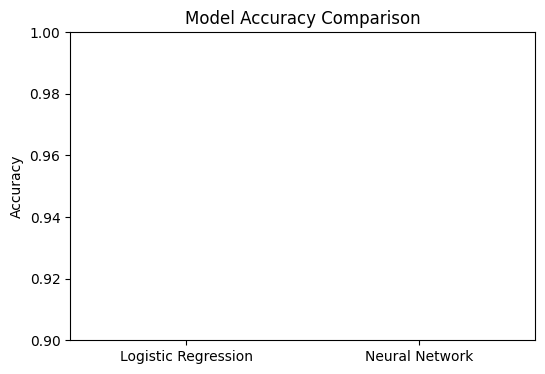

In [14]:
# Provide your code for part 4-1 here
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

plt.figure(figsize=(6, 4))
sns.barplot(x=["Logistic Regression", "Neural Network"],
            y=[accuracy_logreg, accuracy_mlp],
            palette="Blues_d")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)
plt.show()

In [15]:
# Provide your code for part 4-2 here
print("=== Logistic Regression Classification Report ===")
print(classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

print("\n=== Neural Network Classification Report ===")
print(classification_report(y_test, y_pred_mlp))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

=== Logistic Regression Classification Report ===
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         2
           2       0.33      1.00      0.50         4
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         1

    accuracy                           0.25        20
   macro avg       0.08      0.15      0.10        20
weighted avg       0.12      0.25      0.15        20

Confusion Matrix:
 [[0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 4 0 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 2 0 0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

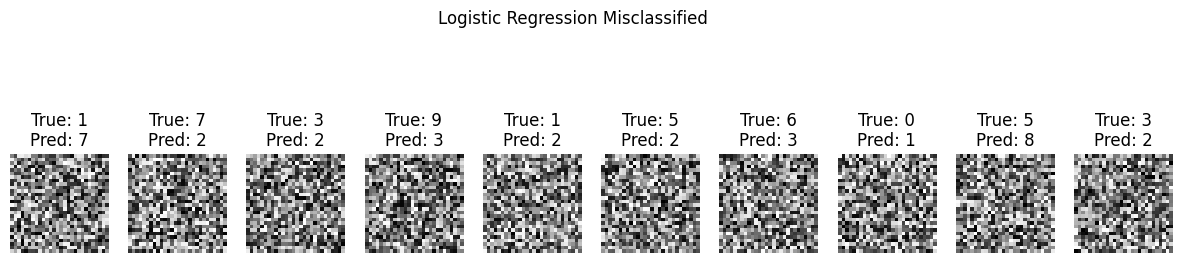

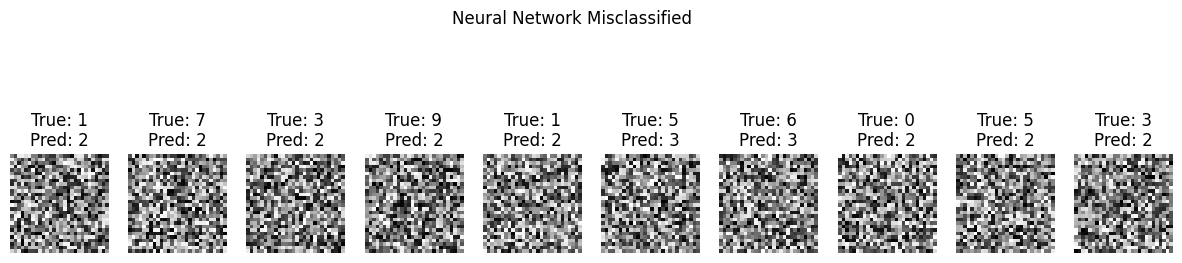

In [16]:
# Provide your code for part 4-3 here
def plot_misclassified(X, y_true, y_pred, title, n=10):
    misclassified = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(15, 4))
    for i, idx in enumerate(misclassified[:n]):
        plt.subplot(1, n, i+1)
        plt.imshow(X[idx].reshape(28, 28), cmap="gray")
        plt.title(f"True: {y_true[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Visualize misclassifications for both models
plot_misclassified(X_test, y_test, y_pred_logreg, "Logistic Regression Misclassified")
plot_misclassified(X_test, y_test, y_pred_mlp, "Neural Network Misclassified")